This project is part of Kaggle 'House prices' competition. I will try to built model which will be predict house prices based of house parameters. <br>
Data description in details are in file 'data_description.txt' in catalogue with this file.

In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scikitplot.plotters import plot_learning_curve
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [77]:
pd.set_option('display.max_column', None)

In [78]:
import warnings
warnings.filterwarnings('ignore')

### Load data

Load train and test data and let's have a first look to it. In train part exist target variable 'SalePrice', in test - no.

In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [82]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [83]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

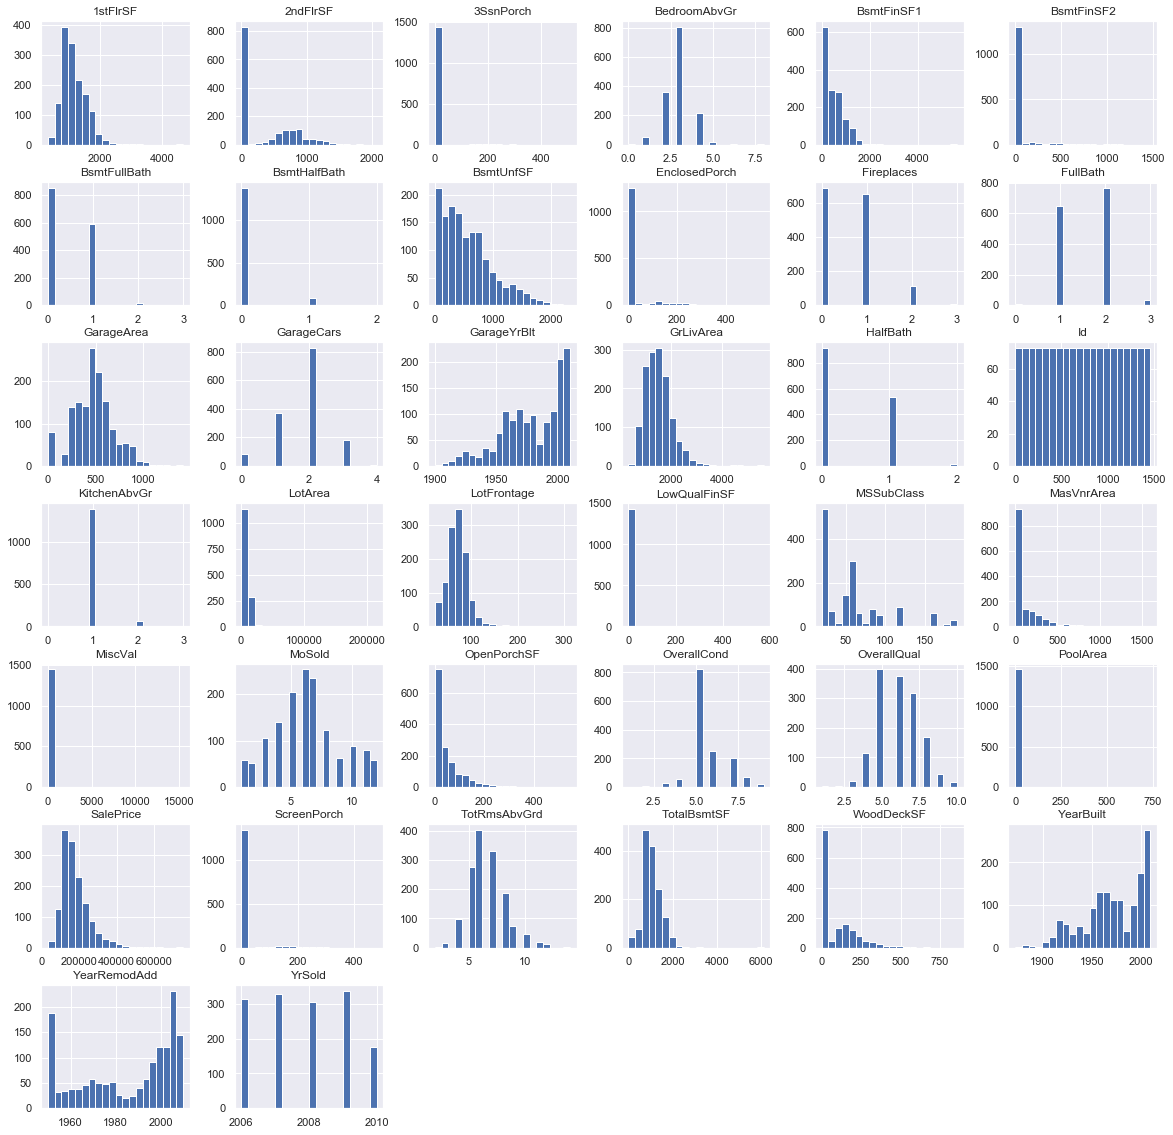

In [84]:
train.hist(figsize=(20, 20), bins=20);

### Cleaning data


So, I'm going to join train and test data in order to avoid duplicating code when I will be cleaning data. And later I will saparate it before training.

In [85]:
# Save train and test ID for final prediction on test part
train_id = train.pop('Id')
test_id = test.pop('Id')

# Save train length 
train_index = train.shape[0]

data_frame = pd.concat([train, test])
data_frame.reset_index(inplace=True, drop=True)

In [86]:
# Set target variable and drop it from dataset
target = train['SalePrice']
data_frame.drop(['SalePrice'], axis=1, inplace=True)

In [87]:
data_frame.shape

(2919, 79)

In [88]:
# Check empty values
data_frame.isnull().sum().sort_values(ascending=False)

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
               ... 
1stFlrSF          0
CentralAir        0
Heating           0
Foundation        0
MSSubClass        0
Length: 79, dtype: int64

In PoolQC, MiscFeature, Alley, Fence most of data is missing. We can drop all these columns, but on the other hand we can try to fill these empty values. Because follow to description data in features as PoolQC, Fecne, FireplaceQC "NaN" means 'No pool', 'No fence' and etc. So, for record where pool or fence are available it can effect on price. Therefore I will replace Nan on NA.

In [89]:
data_frame['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [90]:
data_frame['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [91]:
data_frame['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [92]:
clean_data = data_frame.copy()

In [93]:
for x in ('MiscFeature', 'PoolQC', 'Alley', 'Fence', 'FireplaceQu'):
    clean_data[x] = clean_data[x].fillna('NA')

In [94]:
 clean_data[clean_data['GarageYrBlt'].isnull()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
39,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand
48,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Gd,Y,SBrkr,736,716,0,1452,0.0,0.0,2,0,2,3,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,102,0,0,0,NA,NA,NA,0,6,2009,New,Partial
78,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1768.0,1768.0,GasA,TA,N,SBrkr,1768,0,0,1768,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal
88,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,156,0,0,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml
89,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal


Where 'GarageYrBlt' equals 'NaN', there other empty 'garage' values is empty, as well. Follow desciription data it means no garage. 

In [95]:
# Numerical features replace with number
clean_data['GarageYrBlt'].fillna(0, inplace=True) 

# Feature replace with 'NA'
for x in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    clean_data[x] = clean_data[x].fillna('NA')

In [96]:
clean_data[clean_data['BsmtExposure'].isnull()][:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
17,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,6,Typ,0,NA,CarPort,1967.0,Unf,2.0,516.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,500,10,2006,WD,Normal
39,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,NA,NA,0.0,NA,0.0,0.0,NA,NA,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand
90,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1040,0,0,1040,0.0,0.0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1950.0,Unf,2.0,420.0,TA,TA,Y,0,29,0,0,0,0,NA,NA,NA,0,7,2006,WD,Normal
102,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979.0,Unf,2.0,410.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Alloca
156,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseF,1040,0,0,1040,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1950.0,Unf,2.0,625.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal


The same situation as above: where 'BsmtExposure' is 'null', there other 'Bsmt' features are 'null', as well.

In [97]:
for x in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    clean_data[x] = clean_data[x].fillna('NA')

In [98]:
clean_data[clean_data['LotFrontage'].isnull()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
7,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal
12,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1962.0,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,NA,NA,NA,0,9,2008,WD,Normal
14,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,NA,GdWo,NA,0,5,2008,WD,Normal
16,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,700,3,2010,WD,Normal
24,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,NA,MnPrv,NA,0,5,2010,WD,Normal


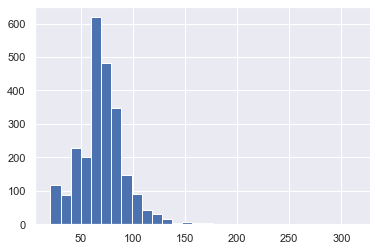

In [99]:
clean_data['LotFrontage'].hist(bins=30);

For 'LotFrontage' we have 259 empty records, there are too many to delete. And we can see that there are no values  equal to 0. So we can try to fill these empty values with median (because we have some outliers).

In [100]:
median = clean_data['LotFrontage'].median()
clean_data['LotFrontage'].fillna(median, inplace=True)

Now, I'm going to fill rest numeric values with 0 and categorical values with 'None' or with most occurring value.

In [101]:
numbers = ('MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'GarageArea', 
           'TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF')
objects = ('MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Electrical', 
           'Exterior2nd', 'KitchenQual', 'Exterior1st', 'SaleType')

# Check distribution for object feats 
for feat in objects:
    print(feat)
    print(clean_data[feat].value_counts())
    print()

MasVnrType
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Utilities
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdn

In [102]:
# Fill last empty numeric values with 0
for feat in numbers:
    clean_data[feat] = clean_data[feat].fillna(0)

# Fill last empty object values with most occuring value    
for feat in objects:
    if feat != 'MasVnrType':
        clean_data[feat] = clean_data[feat].fillna(clean_data[feat].mode()[0])

# Fill with None 
clean_data['MasVnrType'] = clean_data['MasVnrType'].fillna('None')

In [103]:
clean_data.isnull().sum().sort_values(ascending=False)

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
MSSubClass       0
Length: 79, dtype: int64

In [104]:
clean_data.shape

(2919, 79)

### Categorical data

So, now we don't have empty values. Let's transform categorical data to numbers. <br>
I will use 3 methods: <br>
- Label encoder (I've used function factorize)
- Dummies
- And for features with clear scale I will map these feature <br>

In fact, some numerical features as 'MSSubClass' or 'MoSold' are categorical variables. <br>
For label encoder and dummies I've done many trial and error to decide which will be transform with dummies or encoder, but generally for label encoder I choose features with less possible values or above features which I convert from numbers to strings.

In [105]:
preprocessed_data = clean_data.copy()

In [106]:
# Transform numbers to categorical
for x in ('MSSubClass', 'MoSold'):
    preprocessed_data[x] = preprocessed_data[x].astype('str')

In [107]:
# Generally we have 3 main feature types with scale
rates_qual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
rates_basmtype = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': -1, 'NA': 0}
rates_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': -1, 'NA': 0}

In [108]:
# Separate features on groups for mapping
qual = ['GarageCond', 'GarageQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
           'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual', 'PoolQC'] 
bsmt = ['BsmtFinType2', 'BsmtFinType1'] 
exposure = ['BsmtExposure']

In [109]:
# Map features with clear scale
for x in ((qual, rates_qual),  (bsmt, rates_basmtype), (exposure, rates_exposure)):
    feats, rate = x
    for feat in feats:
        preprocessed_data[feat] = preprocessed_data[feat].map(rate)

In [110]:
# LabelEncoder 
encode = ['MSSubClass', 'MoSold', 'Functional', 'CentralAir', 'PavedDrive', 
          'Alley', 'Fence', 'GarageFinish', 'Street', 'LandSlope']
for feat in encode:
    preprocessed_data['{0}_cat'.format(feat)] = pd.factorize(preprocessed_data[feat])[0]


# Get dummies
categorical_features = [x for x in preprocessed_data.select_dtypes(include=np.object).columns if x not in encode]

for feat in categorical_features:
    dummies = pd.get_dummies(preprocessed_data[feat], prefix='{0}_'.format(feat), drop_first=True)
    preprocessed_data = pd.concat([preprocessed_data, dummies], axis=1)

In [111]:
preprocessed_data.shape

(2919, 235)

Now, data prepared. I didn't deal with outliers, because after many trial and error I made conclusion it didn't improve model.  <br>
Let's see a little bit closer to our target values 'SalePrice'.

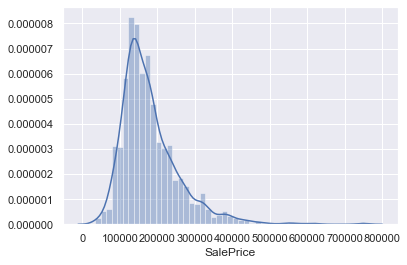

In [112]:
sns.distplot(target);

In [113]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [114]:
# 99 quantile
q = target.quantile(0.99)
q

442567.0100000005

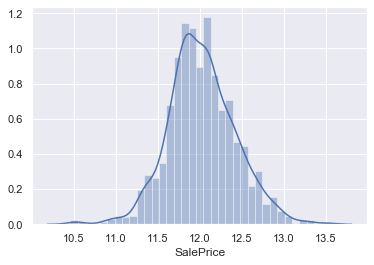

In [115]:
# Transform to log 'SalePrice' 
log_target = np.log(target)
sns.distplot(log_target);

Logarithmic 'SalePrice' looks better because normal destribution and I will use log_target as target variable.

### First model

I will separate data on train and test datasets and I will store test data for final prediction. <br>

In [116]:
train_data = preprocessed_data[:train_index]
test_data = preprocessed_data[train_index:]

print(train_data.shape)
print(test_data.shape)

(1460, 235)
(1459, 235)


In [117]:
# Get numerical features
numeric_features = list(train_data.select_dtypes(include=np.number).columns)

# Set X and y
X = train_data[numeric_features].values
y = log_target.values

In [118]:
def train_model(model_name, model, X, y):
    "Function checks model by cross validation."
    
    score = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    cross_score = np.sqrt(-score)
    print('{0}: '.format(model_name), np.mean(cross_score), cross_score)       

Let's try a few models.

In [119]:
models = {'RandomForest': RandomForestRegressor(),
         'ExtraTrees': ExtraTreesRegressor(),
         'XGB': XGBRegressor(objective ='reg:squarederror'),
         'SVR': SVR(),
         'KNN': KNeighborsRegressor()}

In [120]:
for model_name, model in models.items():
    train_model(model_name, model, X, y)
    print()

RandomForest:  0.1405383075374113 [0.14698971 0.12063453 0.13409178 0.16786141 0.16725801 0.11777557
 0.13660125 0.11940069 0.14443106 0.15033906]

ExtraTrees:  0.13620914653091465 [0.13536142 0.11515746 0.13334089 0.17470522 0.17030933 0.11677864
 0.13031618 0.11340514 0.13397193 0.13874527]

XGB:  0.12927592737783286 [0.13150923 0.10663304 0.11523717 0.16421347 0.14859179 0.11248837
 0.14302913 0.11029699 0.12044252 0.14031756]

SVR:  0.2013049844362483 [0.20394419 0.16273717 0.19817206 0.20251989 0.22939664 0.1878388
 0.21141747 0.19970786 0.21211515 0.20520062]

KNN:  0.22373782503717146 [0.21104224 0.21491222 0.22561222 0.23720417 0.25113515 0.19694291
 0.21822414 0.21136833 0.2383312  0.23260568]



So, we got the first result. 

In [121]:
# Scale feature
X_scaled = StandardScaler().fit_transform(X)

for model_name, model in models.items():
    train_model(model_name, model, X_scaled, y)
    print()

RandomForest:  0.14066360268997163 [0.14796684 0.12186388 0.13489883 0.17174718 0.1650325  0.11818496
 0.13385316 0.11841833 0.14198043 0.15268992]

ExtraTrees:  0.13641967775019812 [0.13707675 0.11335823 0.1322766  0.1722061  0.16963717 0.11894924
 0.12784889 0.11469763 0.13476919 0.14337699]

XGB:  0.12927592737783286 [0.13150923 0.10663304 0.11523717 0.16421347 0.14859179 0.11248837
 0.14302913 0.11029699 0.12044252 0.14031756]

SVR:  0.18338050235072412 [0.19222864 0.16229073 0.20839997 0.18830102 0.23567358 0.17108301
 0.17295069 0.14021701 0.19416906 0.16849134]

KNN:  0.20176536812148244 [0.19551374 0.19742582 0.20344863 0.23205029 0.22843655 0.17111685
 0.20629898 0.17367214 0.21166891 0.19802177]



Standardization improve some models like SVR, but for other models it doesn't affect in significant way. XGBoost perform the best result, I will work with it.

### Feature engineering

Let's create some new features and check if it will improve a model.

In [122]:
model = XGBRegressor(objective ='reg:squarederror')

In [123]:
def check_new_feat(new_feat):
    "Fast add new feature and check already exist model with this feature"
    
    train_data['New'] = new_feat
    
    numeric_features = list(train_data.select_dtypes(include=np.number).columns)
    X = train_data[numeric_features].values
    
    train_model('XGB', model, X, y)
    
    train_data.drop('New', axis=1, inplace=True)

In [124]:
check_new_feat(train_data['GarageArea'] / train_data['GarageCars'])

XGB:  0.1292577460216088 [0.13289574 0.10447144 0.11493536 0.16655402 0.14746001 0.11050632
 0.14604198 0.11233127 0.1183053  0.13907603]


In [125]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['FullBath'])

XGB:  0.12952242575787445 [0.13152797 0.10598225 0.11501636 0.16618163 0.14775127 0.11368625
 0.14341156 0.11029699 0.12064823 0.14072175]


In [126]:
check_new_feat(train_data['1stFlrSF'] + train_data['2ndFlrSF'])

XGB:  0.12766217275522657 [0.13211407 0.10090187 0.1118299  0.16143456 0.14529745 0.10751613
 0.144469   0.1101376  0.12502862 0.13789253]


In [127]:
check_new_feat(train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'])

XGB:  0.12852279484559048 [0.13078989 0.10473868 0.11012546 0.16418441 0.14947546 0.11068884
 0.14261282 0.11011694 0.12023382 0.14226164]


In [128]:
check_new_feat(train_data['OverallQual'] + train_data['OverallCond'])

XGB:  0.12899905779776163 [0.13337708 0.10477499 0.11585616 0.16157007 0.1494846  0.11059262
 0.14658307 0.11101397 0.11909448 0.13764353]


In [129]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['BedroomAbvGr'])

XGB:  0.12895151279657208 [0.13112118 0.10396878 0.11669418 0.16520471 0.14827402 0.11092419
 0.14287913 0.11089644 0.11884786 0.14070463]


In [130]:
check_new_feat(train_data['YearRemodAdd'] - train_data['YearBuilt'])

XGB:  0.1297776242610288 [0.12898663 0.10637944 0.1170321  0.16757313 0.14833138 0.11440518
 0.14428783 0.1103227  0.12132341 0.13913443]


In [131]:
check_new_feat(train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF'])

XGB:  0.12821802276725106 [0.12322449 0.11040839 0.11214266 0.15922019 0.1421012  0.11918308
 0.14439077 0.10862662 0.11964648 0.14323634]


In [132]:
check_new_feat(train_data['BsmtUnfSF']/train_data['TotalBsmtSF'])

XGB:  0.13010584309148793 [0.13229922 0.10698816 0.11437807 0.16735895 0.15005625 0.11129955
 0.14560282 0.11160616 0.12213945 0.13932981]


In [133]:
check_new_feat(train_data['GrLivArea']/train_data['TotRmsAbvGrd'])

XGB:  0.13005901331211459 [0.12973031 0.10227088 0.11480866 0.16636031 0.14883058 0.11198941
 0.1461832  0.11078526 0.1254498  0.14418172]


In [134]:
def add_new_feats(data):
    "Add new features"
    
    data['TotalFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']
    data['BsmtFin'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
    
    return data

In [135]:
train_data = add_new_feats(train_data)

In [136]:
# Try model with new features
numeric_features = list(train_data.select_dtypes(include=np.number).columns)
X = train_data[numeric_features].values
train_model('XGB', model, X, y)

XGB:  0.12627132333530688 [0.13015836 0.10144749 0.1073829  0.16317927 0.1454386  0.10927134
 0.13830565 0.11148182 0.12011917 0.13592863]


### Optimize model 

Now, I'm going to erase features which don't effect on our model and I will find better parameters for model in order to improve result. 

In [137]:
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [138]:
features_list = sorted(zip(model.feature_importances_, train_data[numeric_features]), reverse=True)
features_list

[(0.2718114, 'ExterQual'),
 (0.12885049, 'FireplaceQu'),
 (0.061695863, 'GarageCars'),
 (0.05515075, 'OverallQual'),
 (0.05319302, 'KitchenQual'),
 (0.050556533, 'TotalFlrSF'),
 (0.041710388, 'BsmtQual'),
 (0.037910204, 'TotalBsmtSF'),
 (0.03601334, 'GarageCond'),
 (0.020743292, 'GarageType__Attchd'),
 (0.016219981, 'MSZoning__RL'),
 (0.013376855, 'GarageQual'),
 (0.012860033, 'CentralAir_cat'),
 (0.010641321, 'YearRemodAdd'),
 (0.009117325, 'BsmtFin'),
 (0.008347428, '1stFlrSF'),
 (0.0074304393, 'LotArea'),
 (0.00720937, 'BsmtFinType1'),
 (0.0071543343, 'Heating__Grav'),
 (0.0070564253, 'MSSubClass_cat'),
 (0.006310499, 'GrLivArea'),
 (0.005941025, 'YearBuilt'),
 (0.0054518306, 'BsmtFinSF1'),
 (0.0048879934, 'HalfBath'),
 (0.004833903, 'Neighborhood__Sawyer'),
 (0.004798867, 'BedroomAbvGr'),
 (0.0045668595, 'GarageArea'),
 (0.004471418, 'Exterior2nd__BrkFace'),
 (0.004398277, 'Neighborhood__OldTown'),
 (0.004379418, 'BsmtExposure'),
 (0.0041437075, 'LotShape__Reg'),
 (0.0038504559, 'O

In [139]:
# Lost only significant features
imp_feats = [x for (n, x) in features_list if n > 0]

In [140]:
# Check model with significant features
X = train_data[imp_feats].values
train_model('XGB', model, X, y)

XGB:  0.1234919023990075 [0.12769251 0.10272902 0.10929026 0.15995591 0.14607644 0.10676346
 0.1257312  0.10907211 0.11557464 0.13203346]


In [141]:
# Search better values for model parameters
param_grid = {'n_estimators': np.arange(100, 1500),
             'learning_rate': np.arange(0.01, 1, 0.01),
             'max_depth': np.arange(1, 20),
             'colsample_bytree': np.arange(0, 1, 0.1)}

random_search = RandomizedSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error', n_iter=100)
random_search.fit(X, y)
random_search.best_params_

{'n_estimators': 1033,
 'max_depth': 5,
 'learning_rate': 0.04,
 'colsample_bytree': 0.1}

In [143]:
# Try model with new parameters
model = XGBRegressor(objective ='reg:squarederror', n_estimators = 1033, max_depth = 5, learning_rate = 0.04, colsample_bytree = 0.1) 
train_model('XGB', model, X, y)

XGB:  0.11956701208214404 [0.12497274 0.09882133 0.10991178 0.16638431 0.14213684 0.10476273
 0.12081757 0.10304057 0.10135651 0.12346574]


In [144]:
# Final fit
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.1, gamma=0,
             importance_type='gain', learning_rate=0.04, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1033,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

### Check model on test data

Now let's make prediction on test data and upload result to Kaggle and check how precise is it.

In [148]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_cat,MoSold_cat,Functional_cat,CentralAir_cat,PavedDrive_cat,Alley_cat,Fence_cat,GarageFinish_cat,Street_cat,LandSlope_cat,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,Utilities__NoSeWa,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,MiscFeature__NA,MiscFeature__Othr,MiscFeature__Shed,MiscFeature__TenC,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,TotalFlrSF,BsmtFin
1460,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,-1,2,468.0,1,144.0,270.0,882.0,GasA,3,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,Typ,0,0,Attchd,1961.0,Unf,1.0,730.0,3,3,Y,140,0,0,0,120,0,0,MnPrv,NA

In [146]:
# Add new features
test_data = add_new_feats(test_data)

In [147]:
# Set X and make prediction
X_test = test_data[imp_feats].values
y_pred = np.exp(model.predict(X_test))

In [149]:
# Save result to csv file with 2 columns: Id and Price
test_file = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
test_file.to_csv('submission.csv', index=False)

So, currently I achieved 0.12639 score for train set on Kaggle for my prediction (Kaggle use RMSLE metric).

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard#score

